In [2]:
# !pip install sklearn

  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached scikit_learn-1.0-cp37-cp37m-win_amd64.whl (7.1 MB)


In [3]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
iris = datasets.load_iris()

In [6]:
labels=pd.DataFrame(iris.target)
labels.columns=['labels']

In [11]:
data=pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']


In [14]:
data=pd.concat([data, labels], axis=1)

In [63]:
feature=data[['Sepal length','Sepal width']]

In [ ]:
#1. 클러스터

In [17]:
from sklearn.cluster import KMeans
import seaborn as sns

In [18]:
model=KMeans(n_clusters=3)

In [19]:
model.fit(feature)

KMeans(n_clusters=3)

In [21]:
pred=pd.DataFrame(model.predict(feature))

In [22]:
pred.columns=['predict']

In [26]:
pred

res=pd.concat([feature, pred], axis=1)
res

,Sepal length,Sepal width,predict
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,2
147,6.5,3.0,1
148,6.2,3.4,1


In [27]:
model.cluster_centers_

array([[5.006     , 3.428     ],
       [6.81276596, 3.07446809],
       [5.77358491, 2.69245283]])

In [28]:
df=pd.DataFrame(model.cluster_centers_, columns=['Sepal length', 'Sepal width'])
df

,Sepal length,Sepal width
0,5.006000,3.428000
1,6.812766,3.074468
2,5.773585,2.692453


In [32]:
centerX=df['Sepal length']
centerY=df['Sepal width']

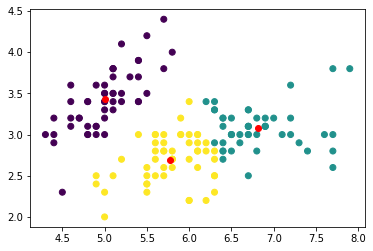

In [33]:
plt.scatter(res['Sepal length'], res['Sepal width'], c=res['predict'])
plt.scatter(centerX, centerY, c='r')

In [50]:
# 표준화 작업을 수행한 다음 KMeans 모델을 생성하고 prediction 수행하시오.
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

feature = ss.fit_transform(df)

model=KMeans(n_clusters=3)

model.fit(feature)

pred=pd.DataFrame(model.predict(feature))

pred.columns=['predict']

pred

res=pd.concat([pd.DataFrame(feature), pred], axis=1)
res



,0,1,predict
0,-1.159019,1.208634,0
1,1.281297,0.031610,1
2,-0.122278,-1.240244,2


In [55]:
# 파이프라인 : 여러 단계를 거쳐 데이터가 정제되고 학습되는 것
# 스케일러로 스케일링 -> 스케일링 결과 데이터를 kmeans 모델에 넣고 학습

In [57]:
from sklearn.pipeline import make_pipeline

In [59]:
scaler = StandardScaler()
model=KMeans(n_clusters=3)

In [60]:
pipeline = make_pipeline(scaler, model)

In [ ]:
feature=data[['Sepal length','Sepal width']]

In [64]:
pipeline.fit(feature)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [66]:
pred=pd.DataFrame(pipeline.predict(feature))
pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,1
147,2
148,2


In [ ]:
# Inertia value : 클러스터링을 수행한 결과, 
# 각 클러스터의 중심점에서 데이터와의 거리를 합산한 값(클러스터의 응집력을 나타냄)
# 클러스터링이 잘 됐다는 것은 클러스터의 응집력이 높다(중심점과 데이터간의 거리가 작다)


In [72]:
kv=range(1,10)
inertias=[]
for k in kv:
    model=KMeans(n_clusters=k)
    model.fit(feature)
    inertias.append(model.inertia_)

C:\Users\poeun\anaconda3\envs\tf2.2\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


Text(0, 0.5, 'inertia')

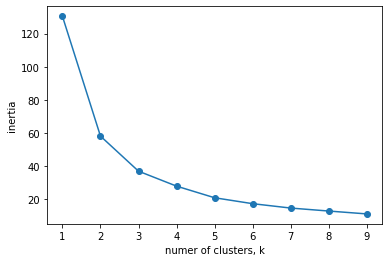

In [75]:
plt.plot(kv, inertias, '-o')
plt.xlabel('numer of clusters, k')
plt.ylabel('inertia')

In [77]:
pd.crosstab(data['labels'], pred[0])

,0,1,2
labels,,,
0,49,1,0
1,1,36,13
2,0,19,31


In [ ]:
#2. 계층적 클러스터(Hierachical Clustering) : 비슷한 것끼리 묶어가면서 
# 최종적으로는 하나의 클러스터가 될때까지 묶는 알고리즘
# 장점 : 클러스터의 개수를 미리 정해주지 않아도 된다.


In [79]:
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram

In [80]:
iris=datasets.load_iris()

In [81]:
labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)


In [82]:
data

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [98]:
aver_dist=linkage(data, method='average')
# average # complete

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [125.0, 125.0, 135.0, 135.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [175.0, 175.0, 185.0, 185.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [180.0, 180.0, 202.5, 202.5],
  [152.5, 152.5, 191.25, 191.25],
  [130.0, 130.0, 171.875, 171.875],
  [115.0, 115.0, 150.9375, 150.9375],
  [92.5, 92.5, 132.96875, 132.96875],
  [62.5, 62.5, 112.734375, 112.734375],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [270.0, 270.0, 292.5, 292.5],
  [255.0, 255.0, 281.25, 281.25],
  [240.0, 240.0, 268.125, 268.125],
  [225.0, 225.0, 254.0625, 254.0625],
  [87.6171875, 87.6171875, 239.53125, 239.53125],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0]

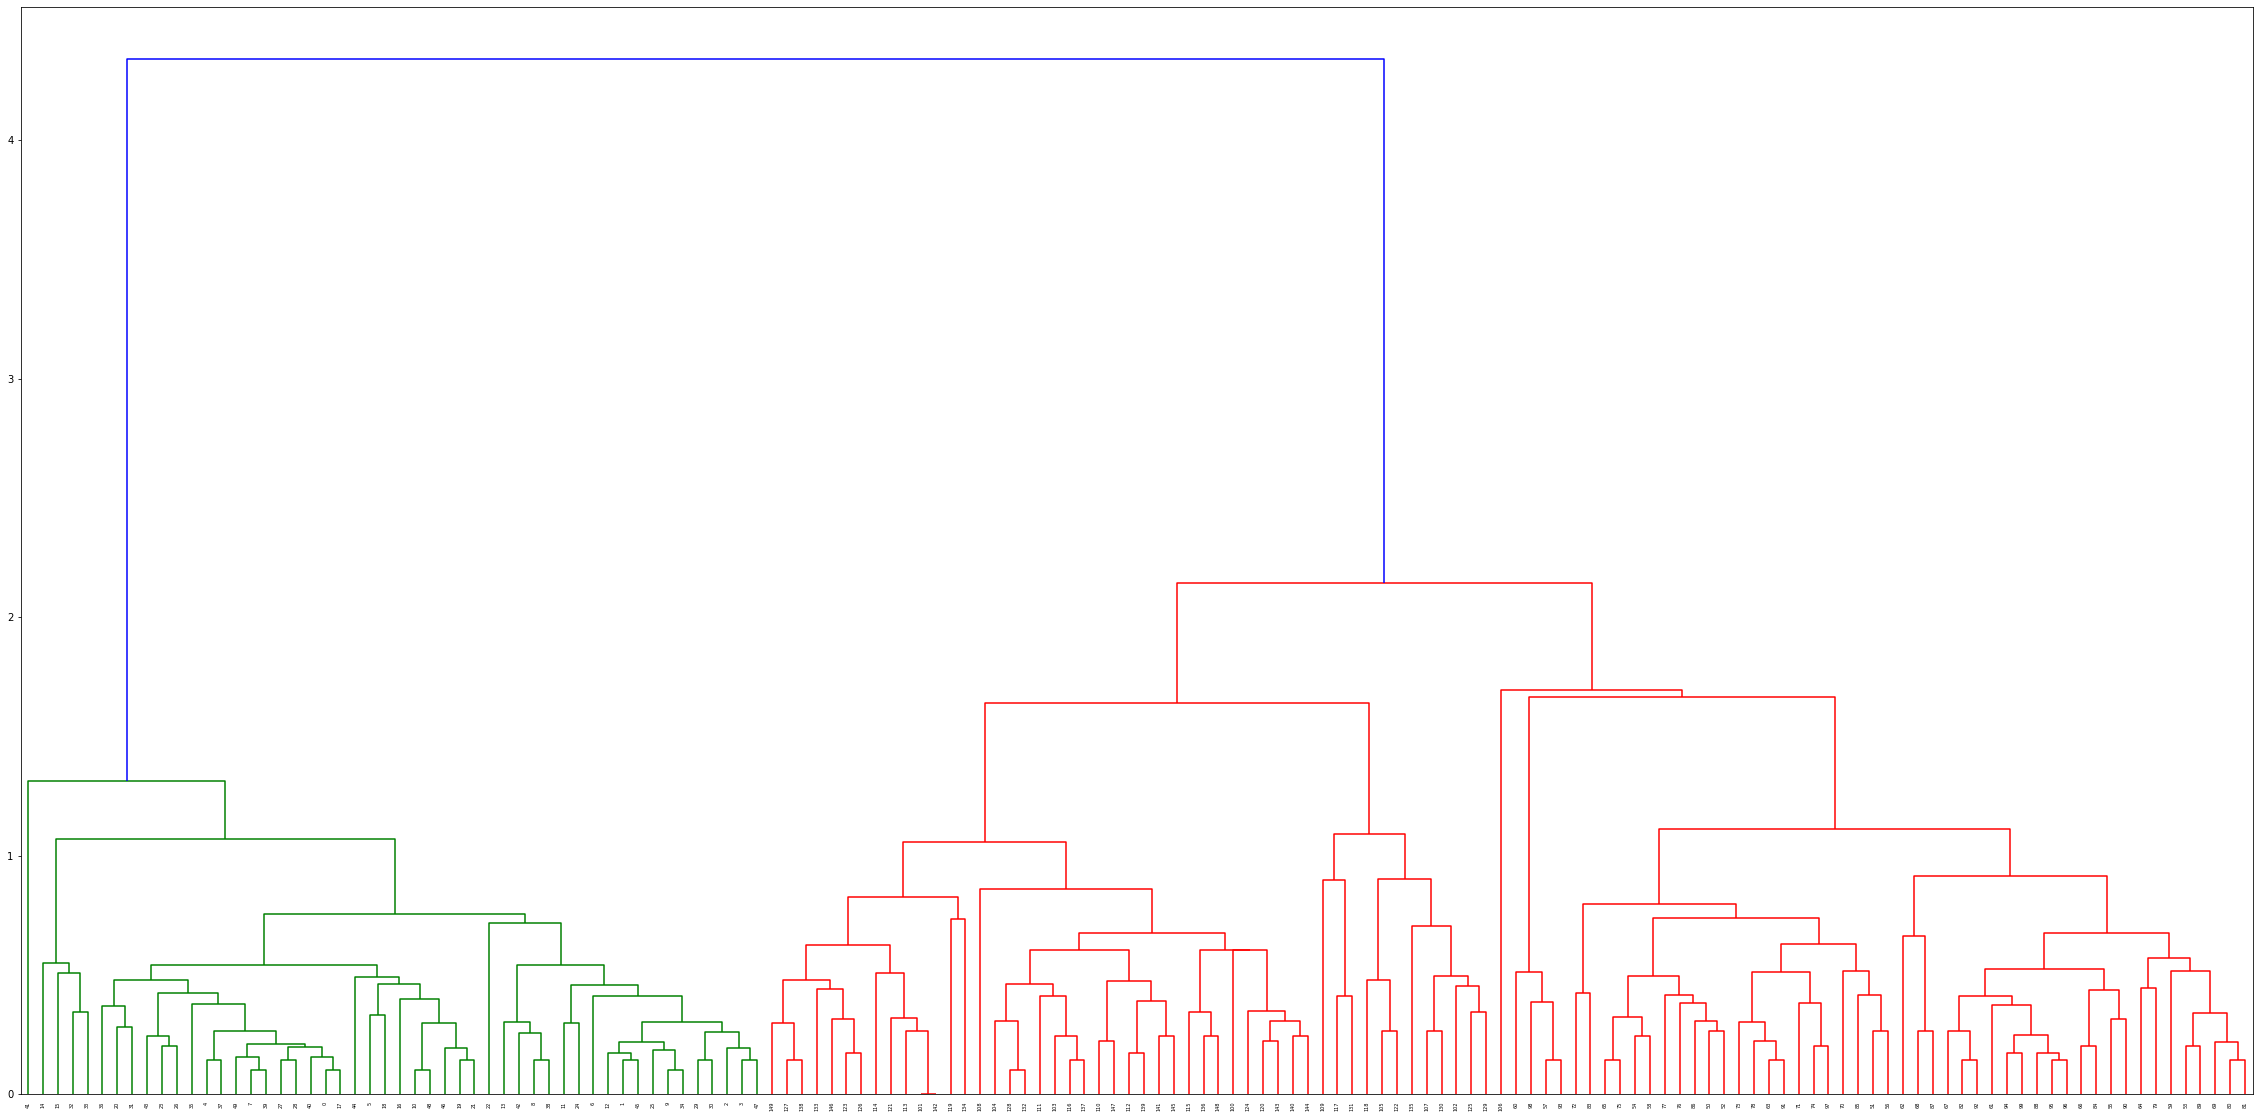

In [99]:
plt.figure(figsize=(40,20))
dendrogram(aver_dist)

In [100]:
predict = pd.DataFrame(fcluster(aver_dist, 3, criterion='distance'))

In [101]:
predict
predict.columns=['predict']

In [102]:
predict
pd.crosstab(labels['labels'], predict['predict'])

predict,1,2
labels,,
0,50,0
1,0,50
2,0,50


In [ ]:
# 3. DBSCAN 클러스터링 (Density Base)
# kmeans, 계층 클러스터링은 클러스터간 거리를 이용하여 클러스터링 
# DBSCAN 밀집도가 높은 부분을 클서트러이, 어느 데이터를 기준으로 반경 내에 데이터가
# n 개 이상 있으면 하나의 클러스터로 간주 

In [103]:
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)
data.head()


,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [104]:
feature = data[ ['Sepal length','Sepal width','Petal length','Petal width']]
feature.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [128]:
model=DBSCAN(min_samples=6)
predict=pd.DataFrame(model.fit_predict(feature))

predict.columns=['predict']

predict

,predict
0,0
1,0
2,0
3,0
4,0
...,...
145,1
146,1
147,1
148,1


In [129]:
res=pd.concat([feature, predict], axis=1)
res

,Sepal length,Sepal width,Petal length,Petal width,predict
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


C:\Users\poeun\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Petal length')

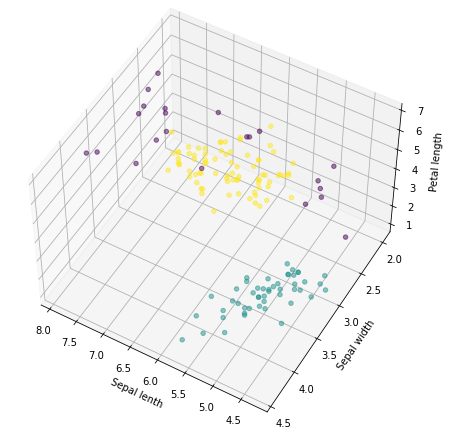

In [132]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=50, azim=120)
ax.scatter(res['Sepal length'],res['Sepal width'],res['Petal length'],c=res['predict'],alpha=0.5)
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')


In [133]:
pd.crosstab(data['labels'], res['predict'])

predict,-1,0,1
labels,,,
0,1,49,0
1,6,0,44
2,15,0,35


In [106]:
X = np.array([[1, 2], [2, 2], [2, 3],[8, 7], [8, 8], [25, 80]])

<AxesSubplot:xlabel='0', ylabel='1'>

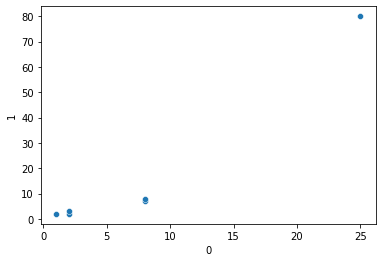

In [107]:
# 산점도 그래프 작성
sns.scatterplot(data=pd.DataFrame(X), x=0,y=1)

In [113]:
# X데이터를 정규화(0~1) 한 다음, X_normal에 저장하시오.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
model = scaler.fit_transform(X)
X_normal = pd.DataFrame(model)
X_normal


,0,1
0,0.000000,0.000000
1,0.041667,0.000000
2,0.041667,0.012821
3,0.291667,0.064103
4,0.291667,0.076923
5,1.000000,1.000000


In [111]:
X

array([[ 1,  2],
       [ 2,  2],
       [ 2,  3],
       [ 8,  7],
       [ 8,  8],
       [25, 80]])

In [112]:
from sklearn.cluster import DBSCAN

In [121]:
model=DBSCAN(eps=3, min_samples=2)
clustering = model.fit(X)

In [122]:
clustering.labels_

array([ 0,  0,  0,  1,  1, -1], dtype=int64)

In [123]:
clustering.fit_predict([[1,3]])

array([-1], dtype=int64)